In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotstar.csv')

In [3]:
df.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


In [4]:
df.tail()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
6869,1260127438,Will Trent,SHOW ON BREAK- NEXT EPISODE ON 15TH FEB. Speci...,Crime,2023,U/A 16+,NaN,1.0,5.0,tv
6870,1260008508,KBD Juniors - Qualifiers,Match highlights of Kabaddi Junior,Sport,2019,U,NaN,1.0,32.0,tv
6871,12551,Dil Hai Hindustani,Sway to the tunes of the best Hindi/Bollywood ...,Reality,2017,U/A 13+,NaN,2.0,57.0,tv
6872,1260065225,On The Brink,The series reveals the hidden splendours of In...,Animals & Nature,2021,U/A 7+,NaN,2.0,18.0,tv
6873,1260129361,Mahanadhi,Tragedy befalls a happy middle-class family af...,Family,2023,U/A 13+,NaN,1.0,10.0,tv


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6874 non-null   int64  
 1   title         6874 non-null   object 
 2   description   6874 non-null   object 
 3   genre         6874 non-null   object 
 4   year          6874 non-null   int64  
 5   age_rating    6874 non-null   object 
 6   running_time  4568 non-null   float64
 7   seasons       2306 non-null   float64
 8   episodes      2306 non-null   float64
 9   type          6874 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 537.2+ KB


In [6]:
df.describe()

,hotstar_id,year,running_time,seasons,episodes
count,6.874000e+03,6874.000000,4568.000000,2306.000000,2306.000000
mean,1.059077e+09,2011.718650,98.746716,2.661752,127.366869
std,4.812666e+08,11.936894,49.411142,4.942716,258.138186
min,3.000000e+00,1928.000000,1.000000,1.000000,1.000000
25%,1.000088e+09,2009.000000,70.000000,1.000000,6.000000
50%,1.260008e+09,2016.000000,116.000000,1.000000,22.000000
75%,1.260099e+09,2019.000000,135.000000,2.000000,130.750000
max,1.837059e+09,2023.000000,229.000000,73.000000,3973.000000


In [7]:
df.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time    2306
seasons         4568
episodes        4568
type               0
dtype: int64

In [8]:
df.shape

(6874, 10)

In [9]:
df['running_time'] = df['running_time'].fillna(df['running_time'].median())

In [10]:
df.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time       0
seasons         4568
episodes        4568
type               0
dtype: int64

In [12]:
df.duplicated().sum() # if we find any duplicate then we can use df = df.drop_duplicates()

np.int64(0)

<function matplotlib.pyplot.show(close=None, block=None)>

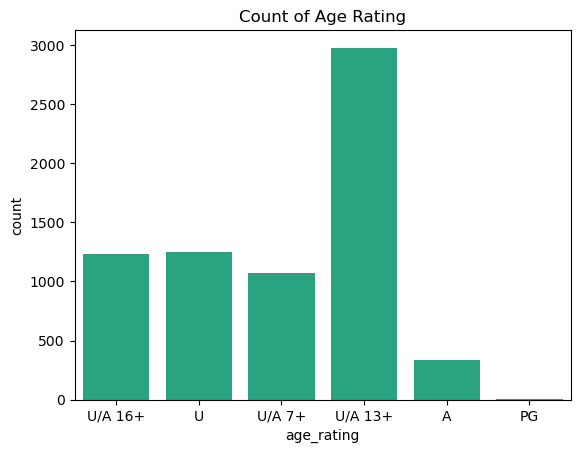

In [42]:
sns.countplot(x = df['age_rating'],data = df, color = '#16B888')
plt.title("Count of Age Rating")
plt.show

In [77]:
gb1 = df.groupby('age_rating').agg({'hotstar_id': 'count'})
gb1

,hotstar_id
age_rating,
A,338
PG,1
U,1251
U/A 13+,2980
U/A 16+,1235
U/A 7+,1069


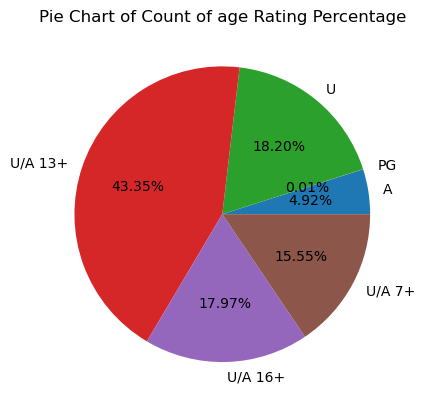

In [81]:
plt.pie(gb1['hotstar_id'].values, labels = gb1.index, autopct = '%.2f%%')
plt.title('Pie Chart of Count of age Rating Percentage')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

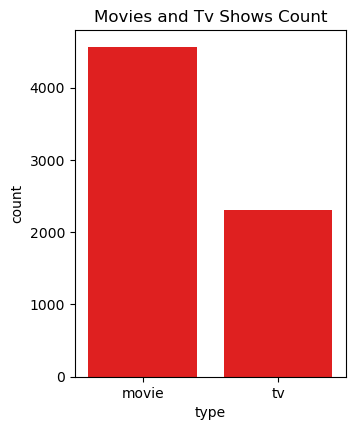

In [92]:
plt.figure(figsize = (3.5,4.5))
sns.countplot(x = df['type'], data = df, color = '#FF0000')
plt.title('Movies and Tv Shows Count')
plt.show

In [66]:
gb = df.groupby('type').agg({'hotstar_id' : 'count'})
gb

,hotstar_id
type,
movie,4568
tv,2306


<function matplotlib.pyplot.show(close=None, block=None)>

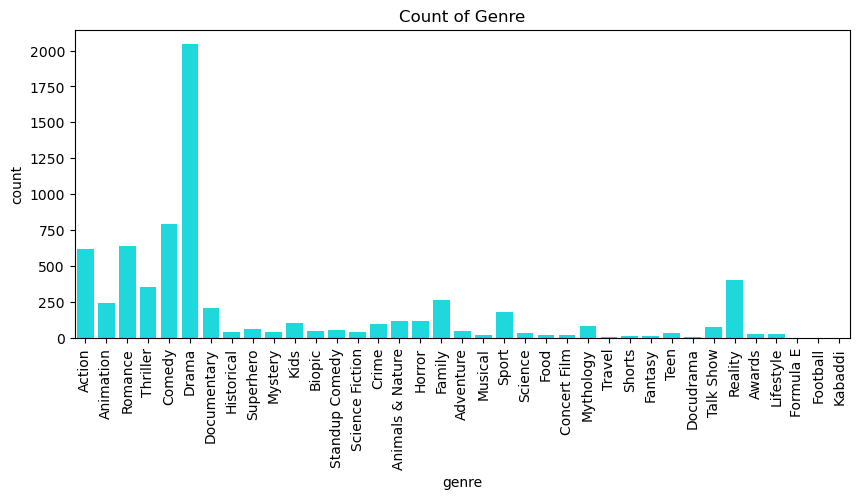

In [65]:
plt.figure(figsize = (10,4))
sns.countplot(x = df['genre'], data = df, color = "#00F6FA")
plt.title('Count of Genre')
plt.xticks(rotation = 90)
plt.show

In [68]:
gb = df.groupby('genre').agg({'hotstar_id': 'count'})
gb

,hotstar_id
genre,
Action,619
Adventure,49
Animals & Nature,119
Animation,240
Awards,28
Biopic,47
Comedy,791
Concert Film,18
Crime,99


In [83]:
gb = df.groupby('year').agg({'hotstar_id': 'count'})
gb

,hotstar_id
year,
1928,1
1937,1
1940,2
1941,5
1942,1
...,...
2019,498
2020,415
2021,561


Text(0.5, 1.0, 'Hotstar Content Released per Year')

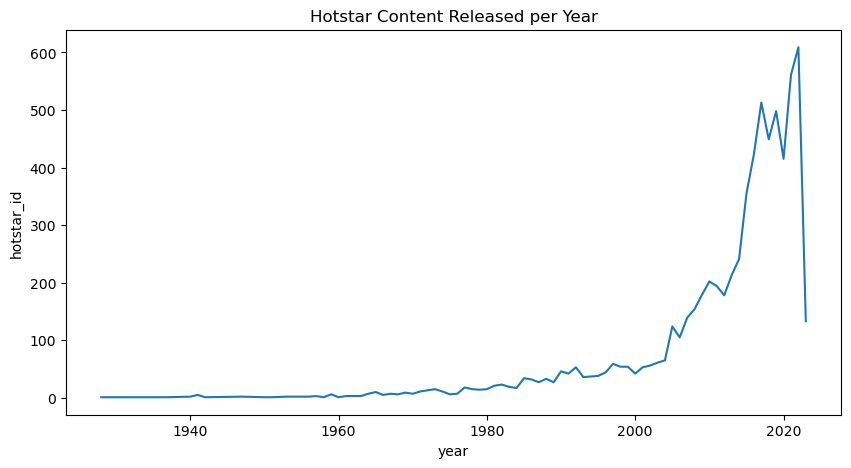

In [90]:
plt.figure(figsize = (10,5))
sns.lineplot(x = gb.index, y = gb['hotstar_id'])
plt.title('Hotstar Content Released per Year')